In [26]:
from sklearn import tree
import pandas as pd
from IPython.display import Image
import pydotplus
import graphviz

We will use the Titanic Dataset to show how Decision Trees are implemented with Sci-Kit Learn

In [13]:
titanic = pd.read_csv("train.csv", index_col = "PassengerId")
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Im thinking that only some columns will be useful for prediction (pclass, sex, age, sibsp (number of siblings/spouses), parch (number of parents/children), fare)

In [14]:
# 1 = Survived, 0 = Died
data = titanic[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Survived"]]
data.dropna(inplace = True)
data.head()

/home/edabdala/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,0
2,1,female,38.0,1,0,71.2833,1
3,3,female,26.0,0,0,7.9250,1
4,1,female,35.0,1,0,53.1000,1
5,3,male,35.0,0,0,8.0500,0


In [15]:
# one hot encoding for categorical variables
# I do not think I need to encode Pclass because it is an ordered, ranked factor
encoded = pd.get_dummies(data[["Sex"]])
encoded.head()

,Sex_female,Sex_male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


In [16]:
# joining the data and moving the target column to the end
data_encoded = data[["Pclass", "Age", "SibSp", "Parch", "Fare"]].join(encoded)
# data_encoded = data_encoded[["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex_female", "Sex_male","Survived"]]
data_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,
1,3,22.0,1,0,7.2500,0,1
2,1,38.0,1,0,71.2833,1,0
3,3,26.0,0,0,7.9250,1,0
4,1,35.0,1,0,53.1000,1,0
5,3,35.0,0,0,8.0500,0,1


In [17]:
clf = tree.DecisionTreeClassifier()
clf_train = clf.fit(data_encoded, data["Survived"])

In [18]:
print(tree.export_graphviz(clf_train, None))

digraph Tree {
node [shape=box] ;
0 [label="X[5] <= 0.5\ngini = 0.482\nsamples = 714\nvalue = [424, 290]"] ;
1 [label="X[1] <= 6.5\ngini = 0.326\nsamples = 453\nvalue = [360, 93]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[2] <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 15\nvalue = [0, 15]"] ;
2 -> 3 ;
4 [label="X[4] <= 31.331\ngini = 0.198\nsamples = 9\nvalue = [8, 1]"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
4 -> 5 ;
6 [label="X[4] <= 35.538\ngini = 0.375\nsamples = 4\nvalue = [3, 1]"] ;
4 -> 6 ;
7 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
6 -> 8 ;
9 [label="X[0] <= 1.5\ngini = 0.295\nsamples = 429\nvalue = [352, 77]"] ;
1 -> 9 ;
10 [label="X[1] <= 53.0\ngini = 0.473\nsamples = 99\nvalue = [61, 38]"] ;
9 -> 10 ;
11 [label="X[4] <= 25.938\ngini = 0.496\nsamples = 77\nvalue = [42, 35]"] ;
10 -> 11 ;
12 [l

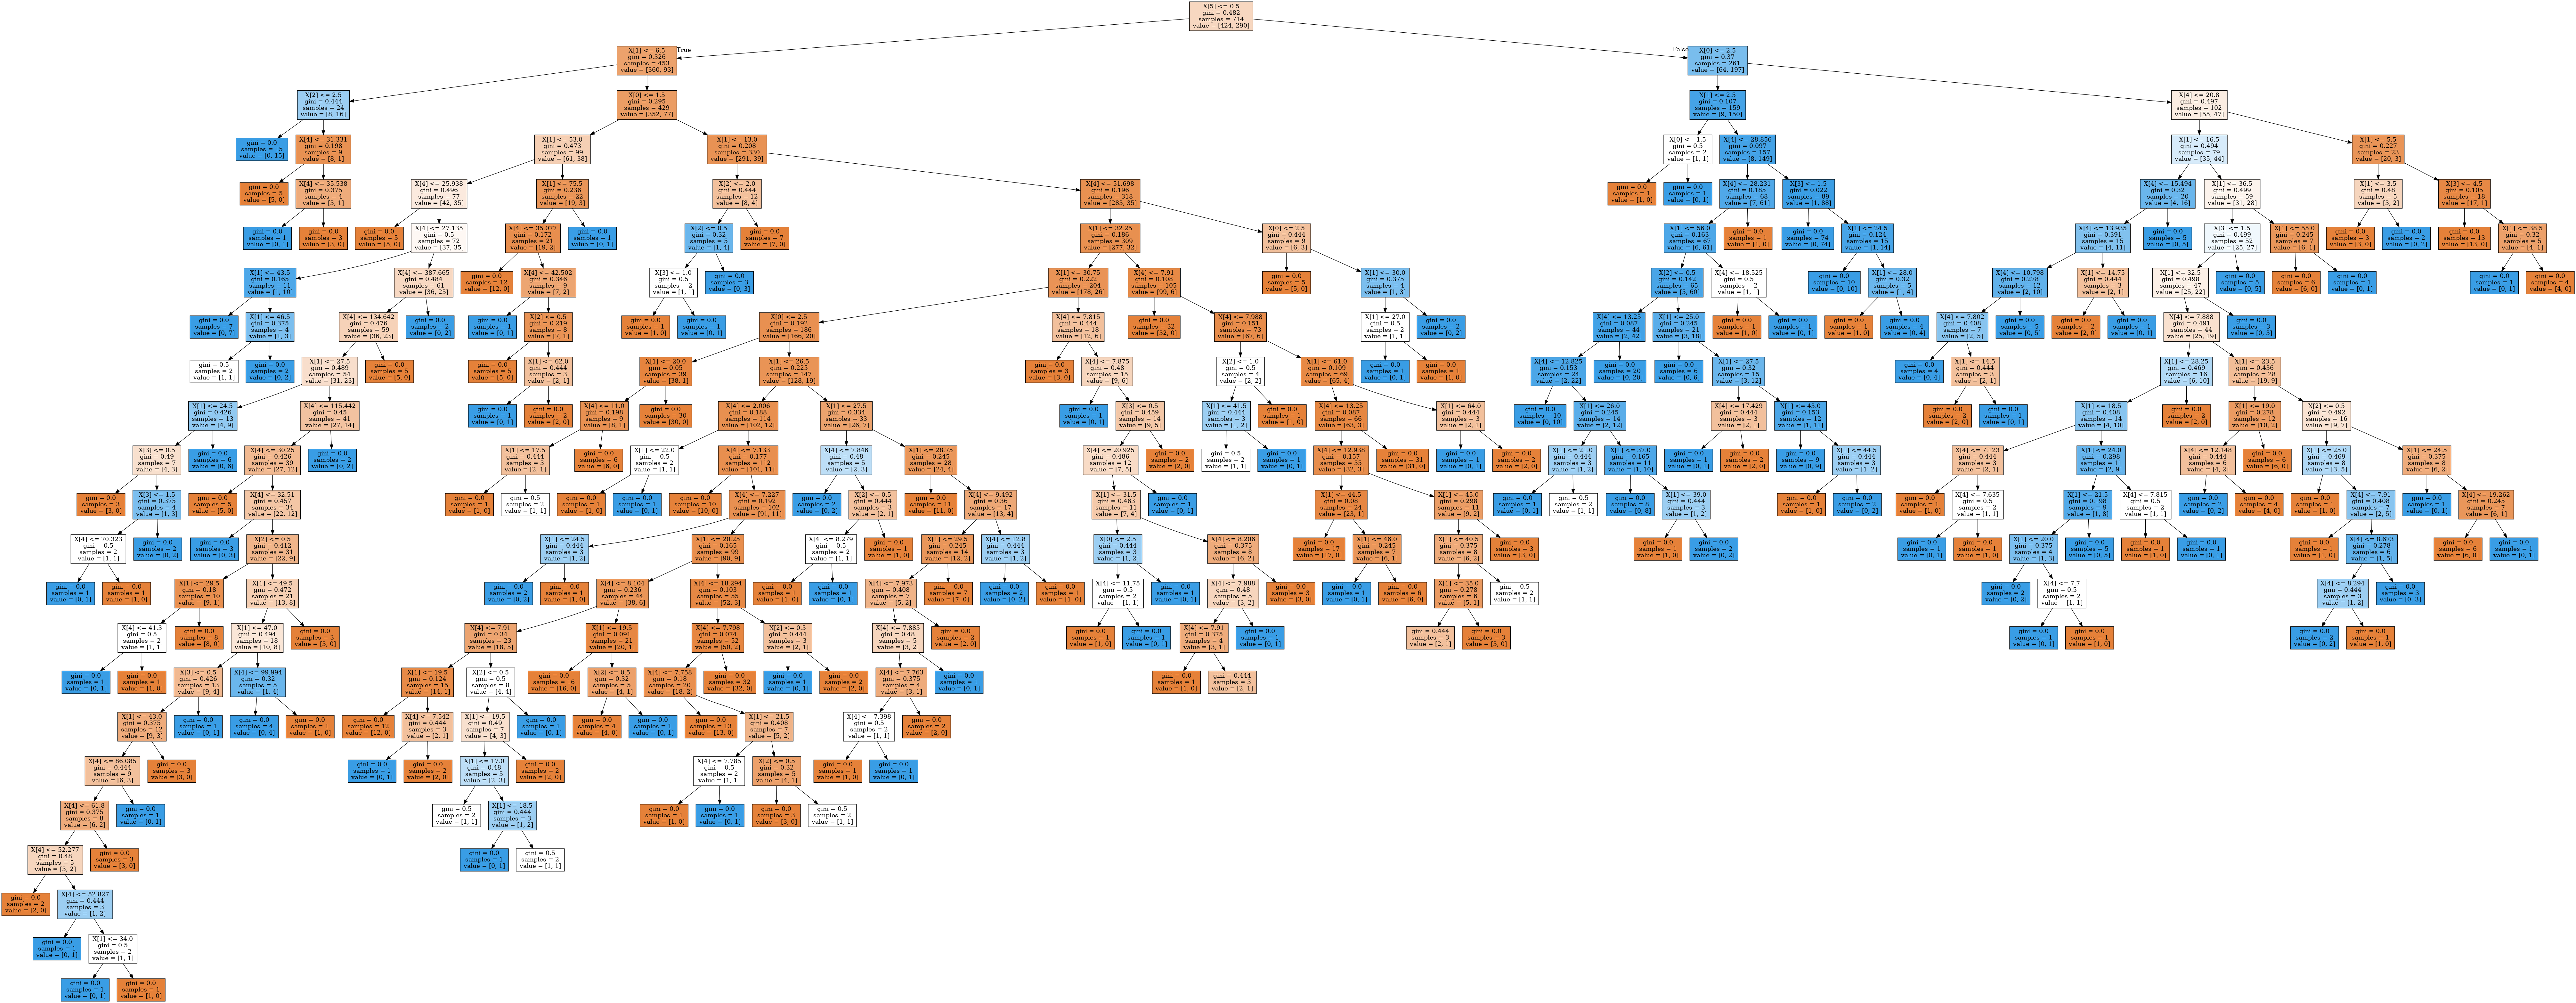

In [33]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [34]:
graph = graphviz.Source(dot_data)
graph.render("Titanic")

'Titanic.pdf'